In [72]:
import pandas as pd


In [73]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os, re

def plot_avg_4df(df1, df2, df3, df4, names,title, num_xticks=10):
    """
    Plot rata-rata dari 4 DataFrame.
    Sumbu X akan mengikuti nama kolom (harus bisa dikonversi ke angka).
    """
    # Validasi nama
    if len(names) != 4:
        raise ValueError("Parameter 'names' harus berisi 4 nama sesuai jumlah DataFrame.")

    # Pastikan semua DF memiliki kolom yang sama
    common_cols = (
        df1.columns.intersection(df2.columns)
        .intersection(df3.columns)
        .intersection(df4.columns)
    )
    df1, df2, df3, df4 = (
        df1[common_cols],
        df2[common_cols],
        df3[common_cols],
        df4[common_cols],
    )

    # Ubah kolom ke nilai numerik (misalnya 1789.56)
    try:
        x_vals = common_cols.astype(float)
    except Exception:
        raise ValueError("Kolom harus berupa angka (atau dapat dikonversi ke float).")

    # Hitung rata-rata tiap kolom
    avg1 = df1.mean()
    avg2 = df2.mean()
    avg3 = df3.mean()
    avg4 = df4.mean()

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, avg1, label='Fresh', linewidth=2)
    plt.plot(x_vals, avg2, label='Fermented', linewidth=2)
    plt.plot(x_vals, avg3, label='Dried', linewidth=2)
    plt.plot(x_vals, avg4, label='Roasted', linewidth=2)

    # Tentukan tick berdasarkan data asli, tapi dibatasi jumlahnya
    tick_positions = np.linspace(x_vals.min(), x_vals.max(), num_xticks)
    tick_positions = np.round(tick_positions).astype(int)  # pastikan bilangan bulat

    plt.xticks(tick_positions, rotation=0)
    plt.xlabel("wavelength (nm)")
    plt.ylabel("reflectance")
    plt.title("")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    # plt.show()
    # 
    dirname = 'spectra_preproced'
    os.makedirs(dirname, exist_ok=True)
    filepath = os.path.join(dirname, f"{title}.png")
    plt.savefig(filepath, dpi=300, bbox_inches='tight')
    print(f"Saved plot to {filepath}")
    plt.show()
    
    
    

fd1

In [74]:
df_cal_basah_fenol = pd.read_csv('../../prepossed_curated_data_2/basah/nir/fenol/cal_sg1.csv')
df_val_basah_fenol = pd.read_csv('../../prepossed_curated_data_2/basah/nir/fenol/val_fd1.csv')
df_cal_basah_gula_reduksi = pd.read_csv('../../prepossed_curated_data_2/basah/nir/gula_reduksi/cal_fd1.csv')
df_val_basah_gula_reduksi = pd.read_csv('../../prepossed_curated_data_2/basah/nir/gula_reduksi/val_fd1.csv')
df_cal_basah_kadar_air = pd.read_csv('../../prepossed_curated_data_2/basah/nir/kadar_air/cal_fd1.csv')
df_val_basah_kadar_air = pd.read_csv('../../prepossed_curated_data_2/basah/nir/kadar_air/val_fd1.csv')
df_cal_basah_lemak = pd.read_csv('../../prepossed_curated_data_2/basah/nir/lemak/cal_fd1.csv')
df_val_basah_lemak = pd.read_csv('../../prepossed_curated_data_2/basah/nir/lemak/val_fd1.csv')
df_cal_basah_protein = pd.read_csv('../../prepossed_curated_data_2/basah/nir/protein/cal_fd1.csv')
df_val_basah_protein = pd.read_csv('../../prepossed_curated_data_2/basah/nir/protein/val_fd1.csv')

df_basah=pd.concat([df_cal_basah_fenol, df_val_basah_fenol,
                    df_cal_basah_gula_reduksi, df_val_basah_gula_reduksi,
                    df_cal_basah_kadar_air, df_val_basah_kadar_air,
                    df_cal_basah_lemak, df_val_basah_lemak,
                    df_cal_basah_protein, df_val_basah_protein])

df_basah.drop(columns=['FENOL','Kadar Air','Gula Reduksi','LEMAK','PROTEIN'], inplace=True)
# df_basah = df_basah.dropna(axis=1)
# df_basah

In [75]:
df_cal_kering_fenol = pd.read_csv('../../prepossed_curated_data_2/kering/nir/fenol/cal_fd1.csv')
df_val_kering_fenol = pd.read_csv('../../prepossed_curated_data_2/kering/nir/fenol/val_fd1.csv')
df_cal_kering_gula_reduksi = pd.read_csv('../../prepossed_curated_data_2/kering/nir/gula_reduksi/cal_fd1.csv')
df_val_kering_gula_reduksi = pd.read_csv('../../prepossed_curated_data_2/kering/nir/gula_reduksi/val_fd1.csv')
df_cal_kering_kadar_air = pd.read_csv('../../prepossed_curated_data_2/kering/nir/kadar_air/cal_fd1.csv')
df_val_kering_kadar_air = pd.read_csv('../../prepossed_curated_data_2/kering/nir/kadar_air/val_fd1.csv')
df_cal_kering_lemak = pd.read_csv('../../prepossed_curated_data_2/kering/nir/lemak/cal_fd1.csv')
df_val_kering_lemak = pd.read_csv('../../prepossed_curated_data_2/kering/nir/lemak/val_fd1.csv')
df_cal_kering_protein = pd.read_csv('../../prepossed_curated_data_2/kering/nir/protein/cal_fd1.csv')
df_val_kering_protein = pd.read_csv('../../prepossed_curated_data_2/kering/nir/protein/val_fd1.csv')

df_kering=pd.concat([df_cal_kering_fenol, df_val_kering_fenol,
                    df_cal_kering_gula_reduksi, df_val_kering_gula_reduksi,
                    df_cal_kering_kadar_air, df_val_kering_kadar_air,
                    df_cal_kering_lemak, df_val_kering_lemak,
                    df_cal_kering_protein, df_val_kering_protein])

df_kering.drop(columns=['FENOL','Kadar Air','Gula Reduksi','LEMAK','PROTEIN'], inplace=True)
# df_kering = df_kering.dropna(axis=1)
# df_kering

In [76]:
df_cal_fermentasi_fenol = pd.read_csv('../../prepossed_curated_data_2/fermentasi/nir/fenol/cal_fd1.csv')
df_val_fermentasi_fenol = pd.read_csv('../../prepossed_curated_data_2/fermentasi/nir/fenol/val_fd1.csv')
df_cal_fermentasi_gula_reduksi = pd.read_csv('../../prepossed_curated_data_2/fermentasi/nir/gula_reduksi/cal_fd1.csv')
df_val_fermentasi_gula_reduksi = pd.read_csv('../../prepossed_curated_data_2/fermentasi/nir/gula_reduksi/val_fd1.csv')
df_cal_fermentasi_kadar_air = pd.read_csv('../../prepossed_curated_data_2/fermentasi/nir/kadar_air/cal_fd1.csv')
df_val_fermentasi_kadar_air = pd.read_csv('../../prepossed_curated_data_2/fermentasi/nir/kadar_air/val_fd1.csv')
df_cal_fermentasi_lemak = pd.read_csv('../../prepossed_curated_data_2/fermentasi/nir/lemak/cal_fd1.csv')
df_val_fermentasi_lemak = pd.read_csv('../../prepossed_curated_data_2/fermentasi/nir/lemak/val_fd1.csv')
df_cal_fermentasi_protein = pd.read_csv('../../prepossed_curated_data_2/fermentasi/nir/protein/cal_fd1.csv')
df_val_fermentasi_protein = pd.read_csv('../../prepossed_curated_data_2/fermentasi/nir/protein/val_fd1.csv')

df_fermentasi=pd.concat([df_cal_fermentasi_fenol, df_val_fermentasi_fenol,
                    df_cal_fermentasi_gula_reduksi, df_val_fermentasi_gula_reduksi,
                    df_cal_fermentasi_kadar_air, df_val_fermentasi_kadar_air,
                    df_cal_fermentasi_lemak, df_val_fermentasi_lemak,
                    df_cal_fermentasi_protein, df_val_fermentasi_protein])

df_fermentasi.drop(columns=['FENOL','Kadar Air','Gula Reduksi','LEMAK','PROTEIN'], inplace=True)
# df_fermentasi = df_fermentasi.dropna(axis=1)
# df_fermentasi

In [77]:
df_cal_roasting_fenol = pd.read_csv('../../prepossed_curated_data_2/roasting/nir/fenol/cal_fd1.csv')
df_val_roasting_fenol = pd.read_csv('../../prepossed_curated_data_2/roasting/nir/fenol/val_fd1.csv')
df_cal_roasting_gula_reduksi = pd.read_csv('../../prepossed_curated_data_2/roasting/nir/gula_reduksi/cal_fd1.csv')
df_val_roasting_gula_reduksi = pd.read_csv('../../prepossed_curated_data_2/roasting/nir/gula_reduksi/val_fd1.csv')
df_cal_roasting_kadar_air = pd.read_csv('../../prepossed_curated_data_2/roasting/nir/kadar_air/cal_fd1.csv')
df_val_roasting_kadar_air = pd.read_csv('../../prepossed_curated_data_2/roasting/nir/kadar_air/val_fd1.csv')
df_cal_roasting_lemak = pd.read_csv('../../prepossed_curated_data_2/roasting/nir/lemak/cal_fd1.csv')
df_val_roasting_lemak = pd.read_csv('../../prepossed_curated_data_2/roasting/nir/lemak/val_fd1.csv')
df_cal_roasting_protein = pd.read_csv('../../prepossed_curated_data_2/roasting/nir/protein/cal_fd1.csv')
df_val_roasting_protein = pd.read_csv('../../prepossed_curated_data_2/roasting/nir/protein/val_fd1.csv')

df_roasting=pd.concat([df_cal_roasting_fenol, df_val_roasting_fenol,
                    df_cal_roasting_gula_reduksi, df_val_roasting_gula_reduksi,
                    df_cal_roasting_kadar_air, df_val_roasting_kadar_air,
                    df_cal_roasting_lemak, df_val_roasting_lemak,
                    df_cal_roasting_protein, df_val_roasting_protein])

df_roasting.drop(columns=['FENOL','Kadar Air','Gula Reduksi','LEMAK','PROTEIN'], inplace=True)
# df_roasting = df_roasting.dropna(axis=1)
# df_roasting

Saved plot to spectra_preproced\fd1.png


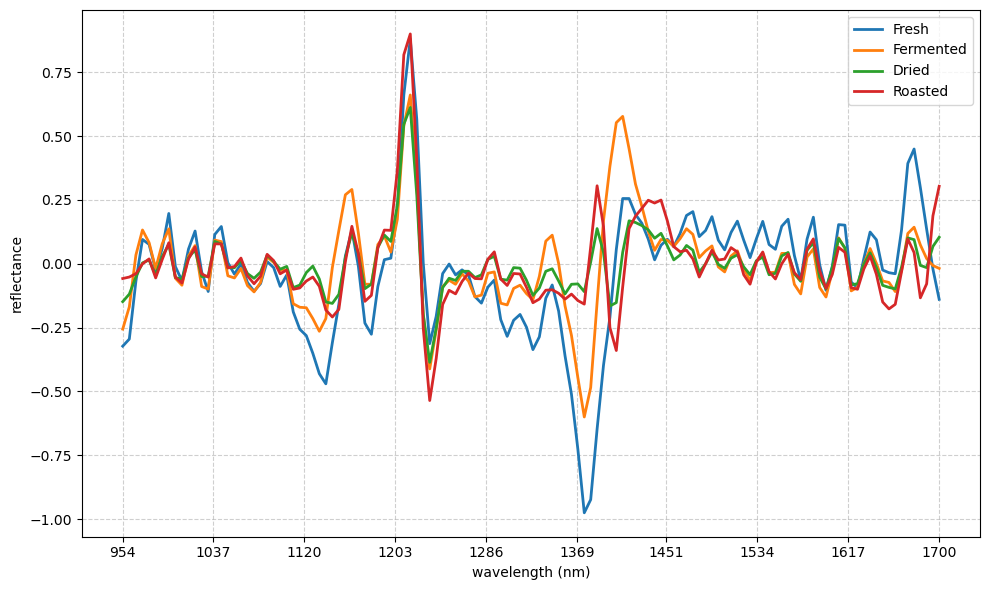

In [78]:
plot_avg_4df(df_basah, df_fermentasi, df_kering, df_roasting,['Basah', 'Fermentasi', 'Kering', 'Roasting'],title='fd1', num_xticks=10)

Saved plot to spectra_preproced\fd1.png


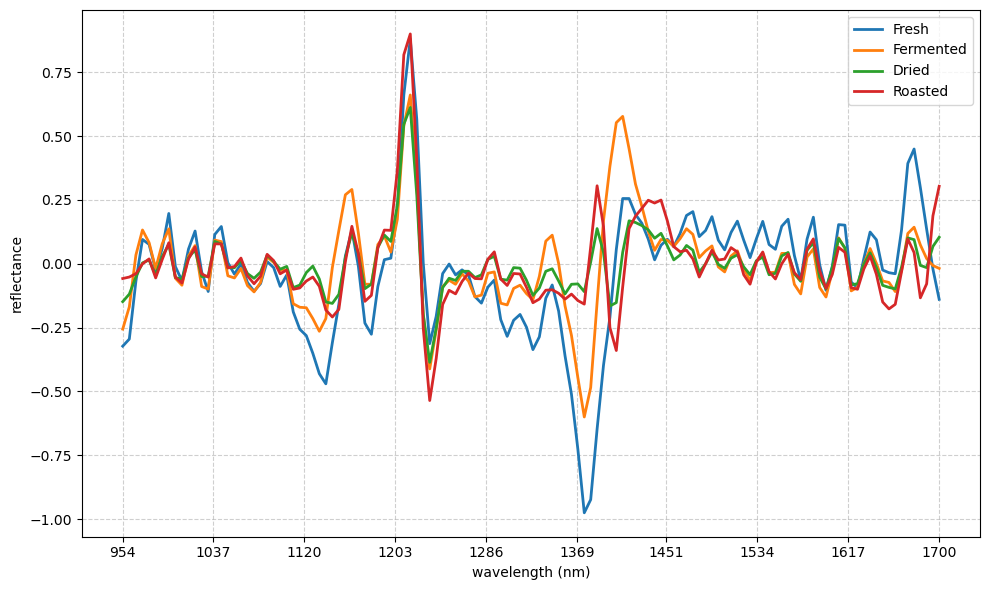

In [79]:
plot_avg_4df(df_basah, df_fermentasi, df_kering, df_roasting,['Basah', 'Fermentasi', 'Kering', 'Roasting'],title='fd1', num_xticks=10)